In [1]:
import pandas as pd

directory = '2_보험금청구서'

data = pd.read_csv('../../evaluation/' + directory + '/result.csv', header=None)
K = data[0][:]
N = len(K)
Ver = ['' for _ in range(N)]
Met = [[0 for _ in range(N)] for _ in range(3)]

for i in range(N):
    Ver[i] = K[i]
    Met[0][i] = data[1][i]
    Met[1][i] = data[2][i]
    Met[2][i] = data[3][i]

data = pd.read_csv('../../time/' + directory + '/time.csv', header=None)
time = {}
Time = [[0 for _ in range(N)] for _ in range(5)]

for i in range(len(data[0])):
    time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]
    
for i, j in enumerate(Ver):
    for k in range(5):
        Time[k][i] = time[j][k]
    print(j + ': ' + str(time[j]))

Ver3_2_0.2_0.4: [35.599238801710634, 278.8233308508845, 1.5134315679568544, 274.6409000736652, 0.0087766364069268]
Ver3_2_0.2_0.5: [36.10397329424863, 280.3114404772768, 1.5132403609775742, 277.8209530481017, 0.0095154979441425]
Ver3_2_0.2_0.6: [65.03852995315397, 289.53981871652127, 1.573708978029709, 274.6811526836736, 0.0078961400702448]
Ver3_2_0.25_0.4: [35.532802638440984, 282.6626135571168, 1.602536380881081, 273.2767869930456, 0.0109955815985651]
Ver3_2_0.25_0.5: [35.39516194031967, 280.37799939070595, 1.5590544974449394, 275.29774561967, 0.0088686990265799]
Ver3_2_0.25_0.6: [65.2185737496555, 280.7523708532352, 1.4464878799891234, 273.7856973515879, 0.0100631525020788]
Ver3_2_0.3_0.4: [35.48988493362272, 284.34423408885993, 1.630790162794607, 273.76606204722185, 0.0090103338260461]
Ver3_2_0.3_0.5: [36.13798217018047, 285.3232728372706, 1.4958853768829787, 274.0952756145213, 0.0098813878427637]
Ver3_2_0.3_0.6: [34.90587036208346, 281.35210452693525, 1.580797799743004, 272.614830

In [2]:
if not directory == '1_보험금청구서_ORG':
    data = pd.read_csv('../../evaluation/1_보험금청구서_ORG/result.csv', header=None)
    for i in range(1, -1, -1):
        Ver.insert(0, data[0][i])
        for j in range(3):
            Met[j].insert(0, data[j+1][i])

    data = pd.read_csv('../../time/1_보험금청구서_ORG/time.csv', header=None)
    for i in range(len(data[0])):
        time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]

    for i, j in enumerate(['Ver2', 'Ver1']):
        for k in range(5):
            Time[k].insert(0, time[j][k])

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

def plot_result(Ver, Met, Time, ext, Name=''):
    N = len(ext)
    Met, Time = np.array(Met), np.array(Time)
    Ver, Met, Time = [Ver[i] for i in ext], Met[:,ext], Time[:,ext]
    idx = np.arange(N) * 4
    bar_width = 0.8
    Bot = [[0 for _ in range(N)] for _ in range(5)]
    for i in range(4):
        for j in range(N):
            if i == 0:
                Bot[i + 1][j] = Time[i][j]
            else:
                Bot[i + 1][j] = Bot[i][j] + Time[i][j]
    fig, ax1 = plt.subplots(figsize=(15, 10))
    plt.grid(True)
    fig.set_facecolor('white')
    b1 = plt.bar(idx, Met[0], bar_width, label='HMean', color='black', zorder=10)
    b2 = plt.bar(idx + bar_width, Met[1], bar_width, label='Precision', color='red', zorder=10)
    b3 = plt.bar(idx + 2*bar_width, Met[2], bar_width, label='Recall', color='blue', zorder=10)
    plt.xticks(idx + 3/2*bar_width, Ver, rotation=-45)
    plt.ylabel('[%]')
    plt.ylim([97, 98])
    ax2 = ax1.twinx()
    b4 = ax2.bar(idx + 3*bar_width, Time[0], label='Data handling\n(Mask, GPU to CPU)', color='silver')
    b5 = ax2.bar(idx + 3*bar_width, Time[1], bottom=Bot[1], label='PA (Pixel Aggregation)', color='indigo')
    b6 = ax2.bar(idx + 3*bar_width, Time[2], bottom=Bot[2], label='Resizing', color='magenta')
    b7 = ax2.bar(idx + 3*bar_width, Time[3], bottom=Bot[3], label='Boxgen', color='olive')
    b8 = ax2.bar(idx + 3*bar_width, Time[4], bottom=Bot[4], label='Data handling (Output)', color='cyan')
    plt.ylim([0, 1500])
    plt.ylabel('Time [ms]')
    bs = [b1, b2, b3, b4, b5, b6, b7, b8]
    labels = [b.get_label() for b in bs]
    plt.legend(bs, labels, loc='upper right', bbox_to_anchor=(1.41, 1.02))
    if Name != '':
        plt.savefig(Name + '.png', dpi=300, bbox_inches='tight', pad_inches=0.3, transparent=False)

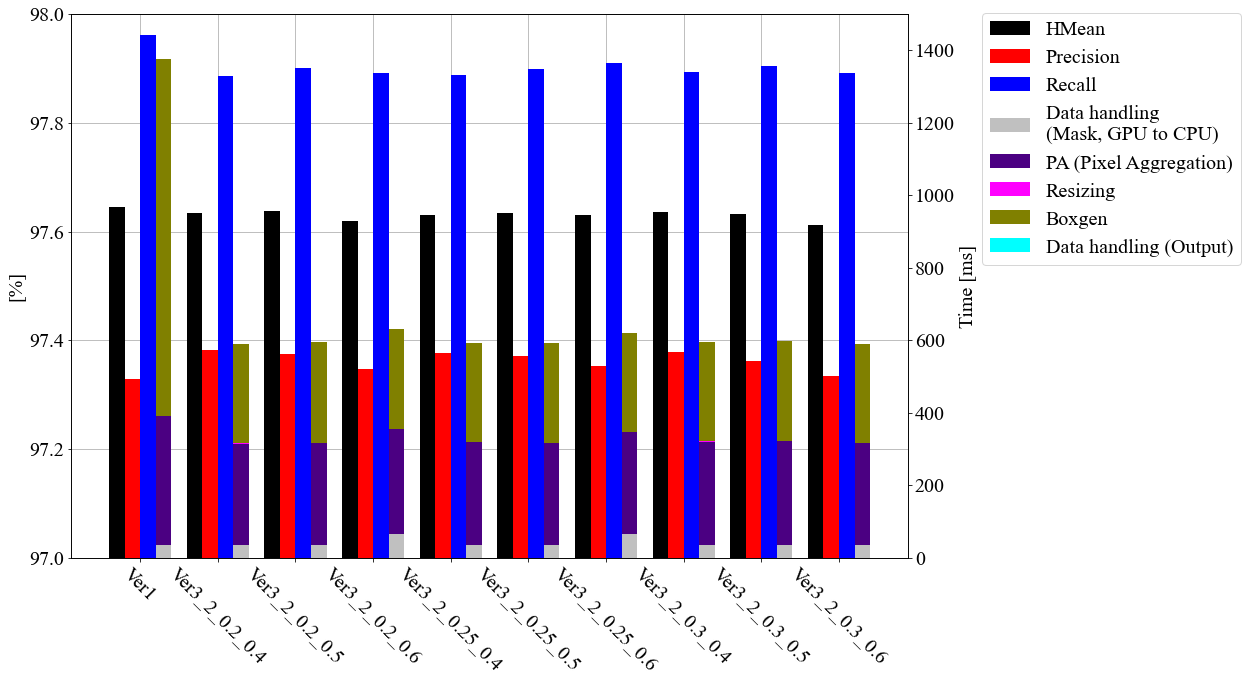

In [4]:
plot_result(Ver, Met, Time, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Ver3_2')

In [5]:
def ra(idx, X, xlb=''):
    '''
    X = [[idx0, idx1, idx2], [idx3, idx4, idx5], [idx6, idx7, idx8]]
    '''
    res = [[], [], []]
    fig = plt.figure(figsize=(15, 10))
    for i1, i2, i3 in X:
        for j in range(3):
            res[j].append(np.array([Met[j][i1], Met[j][i2], Met[j][i3]]).mean())
    plt.grid()
    fig.set_facecolor('white')
    plt.plot(idx, res[0], 'black', linewidth=3, marker='s', markersize=15, label='HMean')
    plt.plot(idx, res[1], 'r--', linewidth=3, marker='v', markersize=15, label='Precision')
    plt.plot(idx, res[2], 'b-.', linewidth=3, marker='^', markersize=15, label='Recall')
    plt.xticks(idx)
    plt.legend(loc='upper right', bbox_to_anchor=(1.21, 1.02))
    plt.xlabel(xlb)
    plt.ylabel('[%]')
    plt.ylim([97.2, 98])
    if xlb != '':
        plt.savefig(xlb + '.png', dpi=300, bbox_inches='tight', pad_inches=0.3, transparent=False)

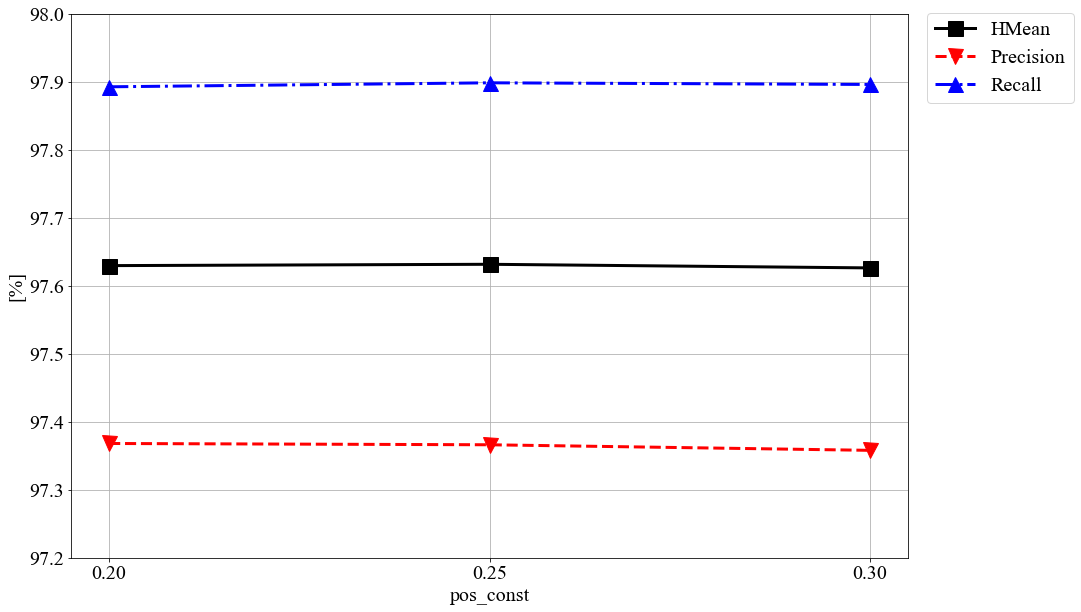

In [6]:
ra([0.2, 0.25, 0.3], [[2, 3, 4], [5, 6, 7], [8, 9, 10]], 'pos_const')

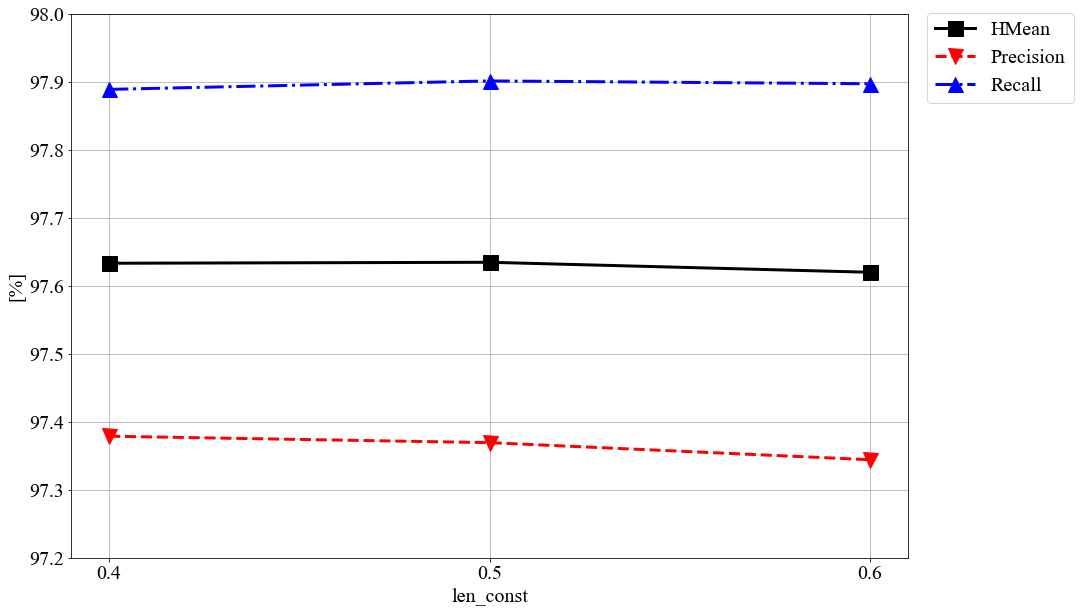

In [7]:
ra([0.4, 0.5, 0.6], [[2, 5, 8], [3, 6, 9], [4, 7, 10]], 'len_const')

In [8]:
def compareIMG(directory, img, cut, *Ver):
    if len(Ver) > 4:
        return
    else:
        fig = plt.figure(figsize=(15, 15))
        for i, j in enumerate(Ver):
            plt.subplot(2,2,i+1)
            tmp = plt.imread('../outputs/' + directory + '/' + j + '/' + img + '.jpg')
            plt.imshow(tmp[cut[0]:cut[0]+cut[2],cut[1]:cut[1]+cut[3],:])
            plt.title(j)
            plt.axis('off')

In [9]:
a = '1_0_0'
b = '2_0.2_0.5'
c = '4_0_0'
d = '4_0.2_0.5'

# compareIMG('WARNING', '만기증권투자신탁1호_png-001', [1000,100,300,300], 'Ver3_' + a, 'Ver3_' + b, 'Ver3_' + c, 'Ver3_' + d)
# plt.savefig('res.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0.3, transparent=False)